In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import tensorflow as tf
import sys
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pickle
from statsmodels.regression.quantile_regression import QuantReg


In [9]:
data = pickle.load(open("SF.pickle", "rb"))


In [10]:
dataset = 5
timediff = data[dataset]["timediff"]
magdiff = data[dataset]["magdiff"]
d = {'timediff': timediff, 'magdiff': magdiff}
data = pd.DataFrame(data=d)

mod = smf.quantreg('magdiff ~ timediff', data)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                magdiff   Pseudo R-squared:            0.0005581
Model:                       QuantReg   Bandwidth:                      0.1967
Method:                 Least Squares   Sparsity:                       0.9604
Date:                Sat, 31 Mar 2018   No. Observations:                 1030
Time:                        15:17:07   Df Residuals:                     1028
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2368      0.025     -9.335      0.000      -0.287      -0.187
timediff   -2.099e-05   2.02e-05     -1.038      0.299   -6.07e-05    1.87e-05

The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


In [11]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['timediff']] + \
            res.conf_int().ix['timediff'].tolist()
    
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('magdiff ~ timediff', data).fit()
ols_ci = ols.conf_int().ix['timediff'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['timediff'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)


      q         a             b        lb        ub
0  0.05 -1.172001 -4.511175e-05 -0.000170  0.000080
1  0.15 -0.764697 -1.425769e-05 -0.000084  0.000056
2  0.25 -0.512570 -6.486851e-05 -0.000128 -0.000001
3  0.35 -0.388478 -2.614410e-05 -0.000076  0.000024
4  0.45 -0.298631 -5.742211e-06 -0.000048  0.000036
5  0.55 -0.192545 -2.095028e-05 -0.000059  0.000017
6  0.65 -0.093045 -2.765320e-05 -0.000062  0.000007
7  0.75 -0.022359 -1.996104e-05 -0.000051  0.000011
8  0.85  0.064290 -1.902671e-05 -0.000049  0.000011
9  0.95  0.155336  1.110984e-10 -0.000027  0.000027
{'ub': 1.3164160365961519e-05, 'lb': -5.7488000410122825e-05, 'a': -0.33303641503593107, 'b': -2.2161920022080651e-05}


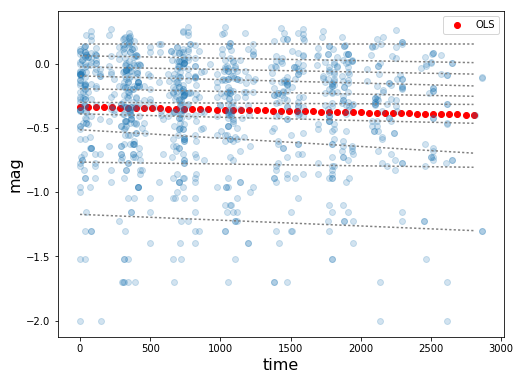

In [12]:
x = np.arange(timediff.min(), timediff.max(), (timediff.max() - timediff.min())/50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols['a'], ols['b'])

ax.scatter(x, y, color='red', label='OLS')
ax.scatter(timediff, magdiff, alpha=.2)
# ax.set_xlim((240, 3000))
# ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel('time', fontsize=16)
ax.set_ylabel('mag', fontsize=16);

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


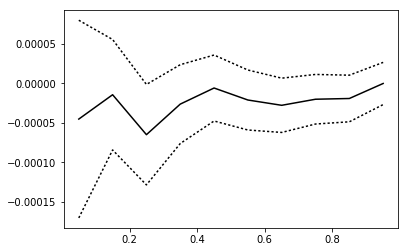

In [21]:

# plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
# plt.plot(models.q, models.ub, linestyle='dotted', color='black')
# plt.plot(models.q, models.lb, linestyle='dotted', color='black')
# plt.hold(True)
# plt.scatter(timediff, magdiff, alpha=.2)



In [ ]:
plt.show()